## What Months of the year are more Beneficial to release movie?

In [1]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Include_Genres_and_Featured_Engineering_Columns.csv')

In [3]:
df.head()

,title,genre_list,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,Thriller,War,Western,vote_average,popularity,vote_count,revenue,budget,release_date,profit
0,2067,"ScienceFiction,Thriller,Drama",0,0,0,0,0,0,1,0,...,1,0,0,5.8,3739.463,141,0,0,2020-10-01,0
1,Welcome to Sudden Death,"Action,Drama,Thriller",1,0,0,0,0,0,1,0,...,1,0,0,6.6,2058.684,113,0,0,2020-09-29,0
2,Enola Holmes,"Crime,Drama,Mystery",0,0,0,0,1,0,1,0,...,0,0,0,7.6,1636.807,2123,0,21000000,2020-09-23,-21000000
3,Mulan,"Action,Adventure,Drama,Fantasy",1,1,0,0,0,0,1,0,...,0,0,0,7.3,1168.889,2534,57000000,200000000,2020-09-04,-143000000
4,Hard Kill,"Action,Thriller",1,0,0,0,0,0,0,0,...,1,0,0,4.7,1034.935,141,0,0,2020-08-25,0


In [4]:
#If the Revenue be zero, we might have false negative profit.
#if the budget be zero, we might have false positive profit.
df =df.loc[(df['revenue'] != 0) & (df['budget'] != 0)]
df.head()

,title,genre_list,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,Thriller,War,Western,vote_average,popularity,vote_count,revenue,budget,release_date,profit
3,Mulan,"Action,Adventure,Drama,Fantasy",1,1,0,0,0,0,1,0,...,0,0,0,7.3,1168.889,2534,57000000,200000000,2020-09-04,-143000000
13,Peninsula,"Action,Horror,Thriller",1,0,0,0,0,0,0,0,...,1,0,0,7.1,733.389,623,35878266,17000000,2020-07-15,18878266
24,Birds of Prey (and the Fantabulous Emancipatio...,"Action,Crime,Comedy",1,0,0,1,1,0,0,0,...,0,0,0,7.2,463.702,6059,201858461,75000000,2020-02-05,126858461
26,Joker,"Crime,Thriller,Drama",0,0,0,0,1,0,1,0,...,1,0,0,8.2,434.909,15195,1074251311,55000000,2019-10-02,1019251311
32,Bad Boys for Life,"Thriller,Action,Crime",1,0,0,0,1,0,0,0,...,1,0,0,7.3,401.306,5408,419074646,90000000,2020-01-15,329074646


In [5]:
df.drop(['Drama',
'Comedy',     
'Thriller',          
'Action',            
'Adventure',          
'Crime',              
'Romance',           
'Horror',          
'ScienceFiction',    
'Family',             
'Fantasy',            
'Mystery',            
'Animation',          
'History',            
'War',                
'Music',              
'Western',            
'Documentary', 'TVMovie'], axis =1, inplace=True)


In [6]:
#Droping more columns...
df.drop(['vote_average','popularity','vote_count'], axis=1, inplace=True)
df.head()

,title,genre_list,revenue,budget,release_date,profit
3,Mulan,"Action,Adventure,Drama,Fantasy",57000000,200000000,2020-09-04,-143000000
13,Peninsula,"Action,Horror,Thriller",35878266,17000000,2020-07-15,18878266
24,Birds of Prey (and the Fantabulous Emancipatio...,"Action,Crime,Comedy",201858461,75000000,2020-02-05,126858461
26,Joker,"Crime,Thriller,Drama",1074251311,55000000,2019-10-02,1019251311
32,Bad Boys for Life,"Thriller,Action,Crime",419074646,90000000,2020-01-15,329074646


In [7]:
#there are movies in the list for 100+ years ago!
df.release_date.sort_values()

7500    1915-02-08
6695    1916-09-04
8880    1920-02-27
5721    1921-01-21
8690    1925-07-12
           ...    
138     2020-09-02
3       2020-09-04
5323    2020-10-24
5635    2020-11-20
4073    2020-12-15
Name: release_date, Length: 4270, dtype: object

In [8]:
#Turn a date column to a better format 
df['release_date'] = pd.to_datetime(df['release_date'])
df.head()

,title,genre_list,revenue,budget,release_date,profit
3,Mulan,"Action,Adventure,Drama,Fantasy",57000000,200000000,2020-09-04,-143000000
13,Peninsula,"Action,Horror,Thriller",35878266,17000000,2020-07-15,18878266
24,Birds of Prey (and the Fantabulous Emancipatio...,"Action,Crime,Comedy",201858461,75000000,2020-02-05,126858461
26,Joker,"Crime,Thriller,Drama",1074251311,55000000,2019-10-02,1019251311
32,Bad Boys for Life,"Thriller,Action,Crime",419074646,90000000,2020-01-15,329074646


In [9]:
#add a new column to categorize movies by year
df['year'] = df['release_date'].dt.year
df.head()

,title,genre_list,revenue,budget,release_date,profit,year
3,Mulan,"Action,Adventure,Drama,Fantasy",57000000,200000000,2020-09-04,-143000000,2020
13,Peninsula,"Action,Horror,Thriller",35878266,17000000,2020-07-15,18878266,2020
24,Birds of Prey (and the Fantabulous Emancipatio...,"Action,Crime,Comedy",201858461,75000000,2020-02-05,126858461,2020
26,Joker,"Crime,Thriller,Drama",1074251311,55000000,2019-10-02,1019251311,2019
32,Bad Boys for Life,"Thriller,Action,Crime",419074646,90000000,2020-01-15,329074646,2020


In [10]:
#Create a new DataFrame that include movies of the last decade except 2020!
df_last_dec = df.loc[(df['year']>2010) & (df['year']<2020) ]
df_last_dec.head()

,title,genre_list,revenue,budget,release_date,profit,year
26,Joker,"Crime,Thriller,Drama",1074251311,55000000,2019-10-02,1019251311,2019
47,It Chapter Two,"Horror,Fantasy",473093228,79000000,2019-09-04,394093228,2019
61,Frozen II,"Animation,Family,Adventure,Comedy,Fantasy",1450026933,150000000,2019-11-20,1300026933,2019
79,Coco,"Animation,Family,Comedy,Adventure,Fantasy",800526015,175000000,2017-10-27,625526015,2017
80,Jumanji: The Next Level,"Adventure,Comedy,Fantasy",796575993,125000000,2019-12-04,671575993,2019


In [11]:
#add a column to realize which month of year movies released
df_last_dec['month'] = df_last_dec['release_date'].dt.month
df_last_dec['month'] = df_last_dec['month'].apply(lambda x: calendar.month_abbr[x])
df_last_dec.head()

/Users/Ali/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Ali/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,genre_list,revenue,budget,release_date,profit,year,month
26,Joker,"Crime,Thriller,Drama",1074251311,55000000,2019-10-02,1019251311,2019,Oct
47,It Chapter Two,"Horror,Fantasy",473093228,79000000,2019-09-04,394093228,2019,Sep
61,Frozen II,"Animation,Family,Adventure,Comedy,Fantasy",1450026933,150000000,2019-11-20,1300026933,2019,Nov
79,Coco,"Animation,Family,Comedy,Adventure,Fantasy",800526015,175000000,2017-10-27,625526015,2017,Oct
80,Jumanji: The Next Level,"Adventure,Comedy,Fantasy",796575993,125000000,2019-12-04,671575993,2019,Dec


In [12]:
#creating My Finla DataFrame that is indexed by month...
An_df=df_last_dec.groupby('month')['profit','revenue', 'budget'].sum().sort_values(by='profit',ascending=False)
An_df

,profit,revenue,budget
month,,,
Jun,23041227217,30467072056,7425844839
Dec,19081258487,26936575783,7855317296
Nov,17507570761,24246504161,6738933400
Apr,16993650463,22201231715,5207581252
Jul,15373883660,21590776650,6216892990
May,14314877651,21524058991,7209181340
Oct,13519701912,19629085151,6109383239
Mar,12545904847,19213753634,6667848787
Sep,9271069943,14168306425,4897236482


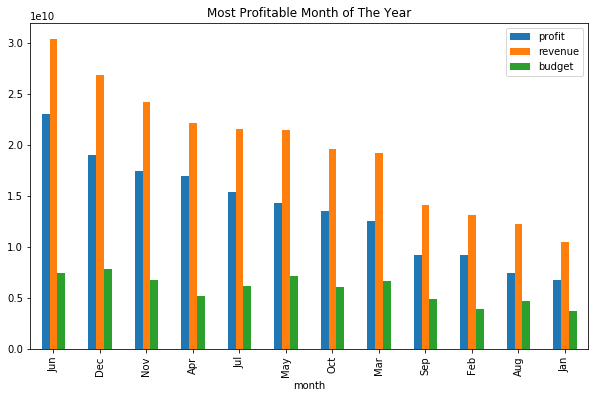

In [13]:
#Simple Ploting with Pandas is fun, but you have not much of a control over your plot

x = An_df.index
y=An_df['profit']

An_df.plot(kind='bar', figsize=(10,6),title='Most Profitable Month of The Year',
           );






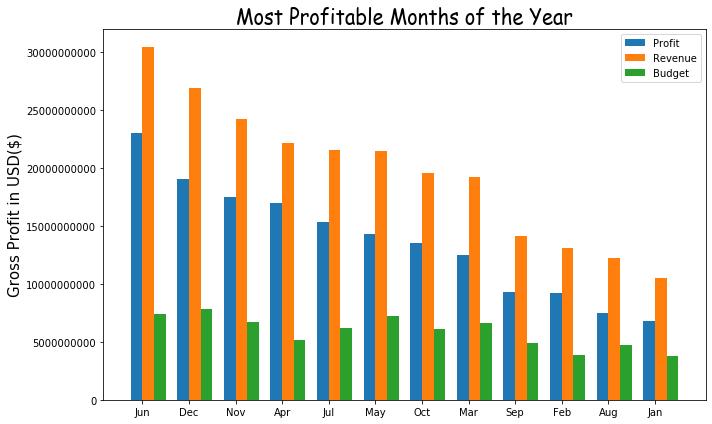

In [14]:
#This cell does exactly what I did above, You have control of every detail of your plot

labels = An_df.index
profit = An_df['profit']
revenue = An_df['revenue']
budget = An_df['budget']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, profit, width, label='Profit')
rects2 = ax.bar(x + width/2, revenue, width, label='Revenue')
rects3 = ax.bar(x + width*1.5, budget, width, label='Budget')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Gross Profit in USD($)',size=15)
ax.set_title('Most Profitable Months of the Year', fontdict={'fontname':'Comic Sans MS','fontsize':20})
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
# ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

# This function Attach a text label above each bar in rects, displaying its height.
# def autolabel(rects):
#     
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)
# autolabel(rects3)

fig.tight_layout()

plt.show()